## 4.1 데이터 학습

### 4.1.1 데이터 주도 학습

데이터 주도 학습은 기계 학습의 핵심 개념입니다. 이 접근법은 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려는 시도입니다.
이는 신경망과 딥러닝이 가지는 중요한 특성이기도 합니다.
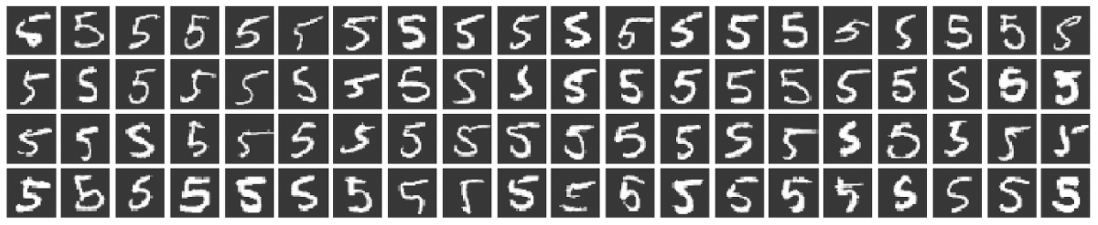

예를 들어 숫자5 손글씨를 보고 숫자5를 판별하는 알고리즘을 만들다고 할 때 알고리즘을 밑바닥부터 설계하기가 어렵다.
이러한 문제는 알고리즘으로 해결하기보다 데이터로부터 문제를 해결하는 방식이 적합하다.

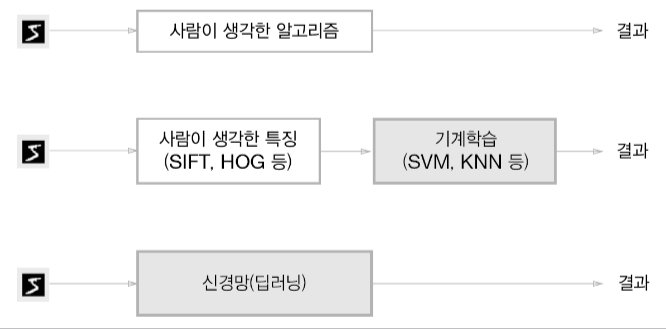
위 그림은 데이터로부터 배우는 방식으로의 패러다임 시프트를 보여준다.
 1. 문제를 해결하는 알고리즘을 밑바닥부터 설계해 문제 해결
 2. 주관적인 특징을 추출하고 그 특징을 기계로 학습하고 주어진 문제를 특징 정보를 통해 해결
 3. 데이터로 신경망을 학습해 결과 도출

 ★ 딥러닝을 종단간 기계학습(end-to-machine learning)이라고도 표현 합니다.
   종단간은 '처음부터 끝까지'라는 의미로, 데이터(입력)에서 목표한 결과(출력)을 사람의 개입 없이 얻는다는 뜻을 담고 있습니다.

### 4.1.2 훈련 데이터와 시험 데이터
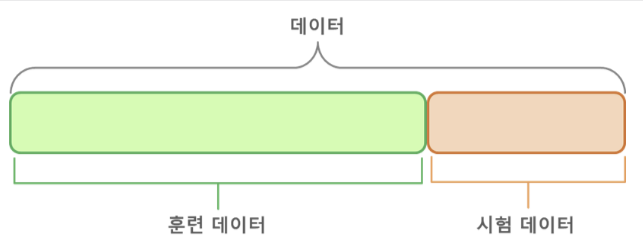
기계 학습 문제는 데이터를 훈련 데이터와 시험 데이터로 나눠 학습과 실험을 수행하는 것이 일반적입니다. 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾습니다. 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가합니다. 이는 우리가 원하는 결과가 범용적으로 사용가능한 모델이기 때문입니다.

## 4.2 손실 함수
신경망이 최적의 매개변수 값을 탐색하기 위해 필요한 기준
신경망 성능의 '나쁨'을 나타내는 지표로,현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 '못하느냐'를 나타낸다. 성능 나쁨을 지표로 하는것이 부자연스러울 수 있는데, 손실 함수에 마이너스를 곱하면 '얼마나 나쁘지 않은가' 즉 '얼마나 좋은가'라는 지표로 변할 수 있음. '나쁨을 최소화 하는 것'은 곧 '좋음을 최대로 하는 것'과 같다고 보기때문에, 성능의 '나쁨'과 '좋음' 중 어느 쪽을 지표로 삼아도 본질적으로 수행하는 일은 다르지 않다.

### 4.2.1 오차제곱합

오차제곱합(Sum of Squares for Error, SSE)은 실제 출력과 목표 출력의 차이(오차)를 제곱하여 모두 더한 것입니다. 이 함수의 값이 작을수록 학습이 잘 이루어진 것으로 판단합니다.

$$ E = \frac{1}{2} \sum_k (y_k - t_k)^2 $$

여기서 $y_k$는 신경망의 출력, $t_k$는 정답 레이블, k는 데이터의 차원 수를 나타냅니다.

In [ ]:
import numpy as np

# MSE 함수 구현
def sum_squares_error(y, t):
	return 0.5 * np.sum((y-t)**2)
# 정답이 2일때
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예 1 : 2일 확률이 가장 높다고 했을 때
y = [0.1,0.2,0.6,0.0,0.05,0.02,0.0,0.0,0.0,0.03]
print(sum_squares_error(np.array(y), np.array(t)))

#>>> 0.10690000000000004

# 예 2 : 5일 확률이 가장 높다고 했을 때
y = [0.1,0.2,0.05,0.0,0.5,0.1,0.05,0.0,0.0,0.0]
print(sum_squares_error(np.array(y), np.array(t)))

#>>> 0.6075

0.10690000000000004
0.6075


### 4.2.2 교차 엔트로피 오차

교차 엔트로피 오차(Cross Entropy Error, CEE)는 목표 출력과 실제 출력의 교차 엔트로피를 계산한 값입니다. 이 함수의 값이 작을수록 학습이 잘 이루어진 것으로 판단합니다.


$$ E = -\sum_k t_k \log y_k $$

여기서 $\log$는 자연로그, $y_k$는 신경망의 출력, $t_k$는 정답 레이블(원-핫 인코딩된 형태), k는 데이터의 차원 수를 나타냅니다.

● 실질적으로 정답일 때의 추정의 자연로그 계산 (정답이 아닌 것은 tk가 0 이므로 결과영향X)

● 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됨

● 자연로그 y=logx의 그래프: 정답출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 됨

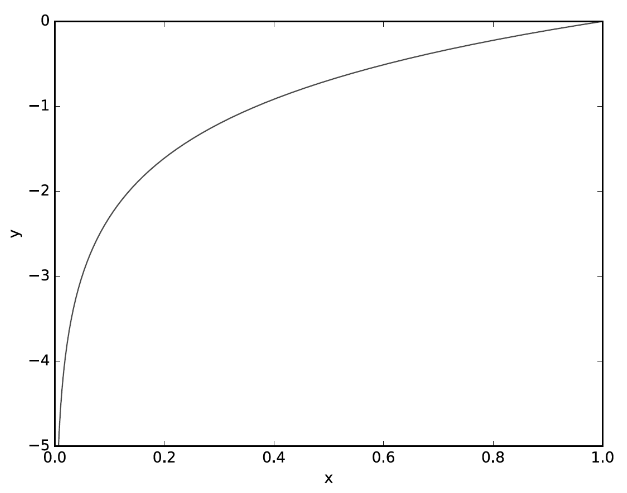

자연로그 y=logx 그래프

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    # log함수에 0을 입력하면 -inf 출력되므로 이를 막기위해 아주 작은 값 더해줌
    return -np.sum(t * np.log(y + delta))
# 정답이 2일때 (0.6의 확률로 2라고 예측)
y = [0.1,0.2,0.6,0.0,0.05,0.02,0.0,0.0,0.0,0.03]
cross_entropy_error(np.array(y), np.array(t))

# >>> 0.510825457099338

0.510825457099338


### 4.2.3 미니배치 학습

미니배치 학습은 전체 학습 데이터 중 일부만을 무작위로 선택하여 학습을 수행하는 방법입니다. 이 방법은 전체 학습 데이터를 사용하는 것에 비해 계산 속도가 빠르며, 근사적으로 충분히 좋은 결과를 얻을 수 있습니다.

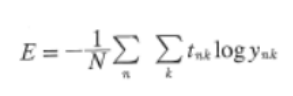


● N: 미니배치의 크기

● n, k: n번째 데이터의 k차원 째의 값을 의미 (ynk: 신경망 출력(추정 값), tnk: 정답 레이블)

● 마지막에 N(데이터의 갯수)로 나누어 '평균 손실 함수'를 구함.
  훈련 데이터의 개수와 관계없이 통일된 지표를 얻음

### 4.2.4 (배치용)교차 엔트로피 오차 구현

배치용 교차 엔트로피 오차는 미니배치 학습에서 사용할 수 있는 교차 엔트로피 오차를 구현한 것입니다. 이 함수는 미니배치의 크기에 상관없이 교차 엔트로피 오차를 계산할 수 있습니다.

In [1]:
def batch_cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

### 4.2.5 왜 손실 함수를 설정하는가?

손실 함수는 신경망 학습의 '나쁨'을 나타내는 지표입니다.
이 지표를 가장 작게 만드는 가중치 매개변수 값을 찾는 것이 학습의 목표입니다.
이를 위해 손실 함수의 값을 가장 작게 만드는 가중치 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복합니다.

## 4.3 수치 미분

### 4.3.1 미분

미분은 어떤 함수의 기울기를 구하는 연산입니다. 신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 미분을 계산하게 됩니다.


### 4.3.2 수치 미분의 예

수치 미분은 아주 작은 차분으로 미분을 구하는 것입니다. 이 방법은 단순하고 구현하기 쉽지만, 계산 오차가 발생할 수 있습니다.

In [2]:
import numpy as np

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

# 예시 함수
def function_1(x):
    return 0.01*x**2 + 0.1*x

# x = 5에서의 미분
print(numerical_diff(function_1, 5))

# x = 10에서의 미분
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


위의 코드를 실행하면, x = 5에서의 함수의 미분값은 약 0.2, x = 10에서의 함수의 미분값은 약 0.3임을 알 수 있습니다.

### 4.3.3 편미분

편미분은 변수가 여럿인 함수에 대한 미분을 의미합니다. 편미분에서는 목표 변수 하나에 초점을 맞추고 다른 변수는 고정시킨 채 미분을 계산합니다.

In [3]:
def function_2(x):
    return x[0]**2 + x[1]**2

def numerical_partial_diff(f, x, idx):
    h = 1e-4
    x_plus_h = x.copy()
    x_plus_h[idx] += h
    x_minus_h = x.copy()
    x_minus_h[idx] -= h
    return (f(x_plus_h) - f(x_minus_h)) / (2*h)

# x0 = 3, x1 = 4에서 x0에 대한 편미분
print(numerical_partial_diff(function_2, np.array([3.0, 4.0]), 0))

# x0 = 3, x1 = 4에서 x1에 대한 편미분
print(numerical_partial_diff(function_2, np.array([3.0, 4.0]), 1))

6.00000000000378
7.999999999999119


위의 코드를 실행하면, x0 = 3, x1 = 4에서 x0에 대한 편미분값은 약 6, x1에 대한 편미분값은 약 8임을 알 수 있습니다. 이는 각 변수에 대한 함수의 민감도를 나타냅니다.

### 4.4 기울기

기울기는 모든 변수의 편미분을 벡터로 정리한 것을 의미합니다. 기울기는 함수의 출력값을 가장 크게 줄이는 방향을 가리킵니다.

### 4.4.1 경사 하강법

경사 하강법은 기울기를 이용하여 함수의 최솟값을 찾는 방법입니다. 현재 위치에서 기울어진 방향으로 일정 거리만큼 이동하고, 이 과정을 반복하여 함수의 값을 점차 줄여나갑니다. 경사 하강법은 신경망 학습에서 중요한 알고리즘으로, 가중치 매개변수의 최적값을 찾는 데 사용됩니다.

![Gradient Descent](https://miro.medium.com/max/1200/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg)


In [4]:
import numpy as np

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

### 4.4.2 신경망에서의 기울기

신경망에서의 기울기는 가중치 매개변수에 대한 손실 함수의 기울기를 의미합니다. 신경망이 복잡해질수록 이 기울기를 계산하는 것은 복잡해지지만, 효율적인 방법들이 있습니다. 이 중 하나가 오차역전파법(Backpropagation)입니다.